# Rent Prediction using Multiple Linear Regression
##### Roger Qiu - 5/20/2022
### Introduction
In predicting the price of a home, one factor to consider is the size of the home. The relationship between those two variables, price and size, is important, but there are other variables that factor in to pricing a home: location, air quality, demographics, parking, and more. When making predictions for price, our dependent variable, we’ll want to use multiple independent variables. To do this, we’ll use a supervised machine learning method called a Multiple Linear Regression, which uses two or more independent variables to predict the values of the dependent variable. 
### The Data
To begin, let's load and inspect our data from the csv file, inspect it, pick our dependent (Y) and independent (X) variables. Then as with most machine learning algorithms, we have to split our dataset into a training set to fit the model and a test set or the data partitioned away at the very start of the experiment to provide an unbiased evaluation of the model later on. Typically, 80% of your data is used for the training set and 20% of your data used for testing.

In [2]:
# load libraries
import pandas as pd
import numpy as np

# import the dataset of various apartments in manhattan, their features and rent price
streeteasy = pd.read_csv("streeteasy.csv")

# load the data into a pandas dataframe for manipulation, view the data
df = pd.DataFrame(streeteasy)
print(df.head())

# look for any nulls in the data fields
df.isnull().sum()

# check the object types
df.dtypes

   rental_id   rent  bedrooms  bathrooms  size_sqft  min_to_subway  floor  \
0       1545   2550       0.0          1        480              9    2.0   
1       2472  11500       2.0          2       2000              4    1.0   
2       2919   4500       1.0          1        916              2   51.0   
3       2790   4795       1.0          1        975              3    8.0   
4       3946  17500       2.0          2       4800              3    4.0   

   building_age_yrs  no_fee  has_roofdeck  has_washer_dryer  has_doorman  \
0                17       1             1                 0            0   
1                96       0             0                 0            0   
2                29       0             1                 0            1   
3                31       0             0                 0            1   
4               136       0             0                 0            1   

   has_elevator  has_dishwasher  has_patio  has_gym       neighborhood  \
0     

rental_id             int64
rent                  int64
bedrooms            float64
bathrooms             int64
size_sqft             int64
min_to_subway         int64
floor               float64
building_age_yrs      int64
no_fee                int64
has_roofdeck          int64
has_washer_dryer      int64
has_doorman           int64
has_elevator          int64
has_dishwasher        int64
has_patio             int64
has_gym               int64
neighborhood         object
borough              object
dtype: object

In [3]:

# set x as all of the input values that we picked as our dependent variables
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
print("x is ")
print(x.head())

# set y as the output to predict: rent
y = df[['rent']]
print("y is ")
print(y.head())

# load the train test split module from sklean library
from sklearn.model_selection import train_test_split

# split x and y into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 6)

# show the shape of the x arrays
print("x_train array shape is ")
print(x_train.shape)
print("x_test array shape is ")
print(x_test.shape)

# show the shape of the rent
print("y_train array shape is ")
print(y_train.shape)
print("y_test array shape is ")
print(y_test.shape)

x is 
   bedrooms  bathrooms  size_sqft  min_to_subway  floor  building_age_yrs  \
0       0.0          1        480              9    2.0                17   
1       2.0          2       2000              4    1.0                96   
2       1.0          1        916              2   51.0                29   
3       1.0          1        975              3    8.0                31   
4       2.0          2       4800              3    4.0               136   

   no_fee  has_roofdeck  has_washer_dryer  has_doorman  has_elevator  \
0       1             1                 0            0             1   
1       0             0                 0            0             0   
2       0             1                 0            1             1   
3       0             0                 0            1             1   
4       0             0                 0            1             1   

   has_dishwasher  has_patio  has_gym  
0               1          0        1  
1               0 

### Multiple Linear Regression Model
Now that we've seen our dataframe, the variables and divided them into test and training sets, lets build our multiple linear regression model. In here, lets see the correlation of multiple variables and its effect on rent prices. Let's use it to predict rent given our own inputs (independent variables). Let's predict the rent of an apartment with: 2 Bedrooms, 2 Bathrooms, 1200 sqft, 10 minutes to subway, 4 floors up, 20 years old, has a fee, no roofdeck, no washer dryer, no doorman, has elevator, has dishwasher, has patio and no gym. 

In [4]:
# load library
from sklearn.linear_model import LinearRegression

# set mlr as our multiple regression model
mlr = LinearRegression()

# fit in x train and y train arrays into this 3d arrray, use .values so we remove header
model = mlr.fit(x_train.values, y_train.values)

# create new room with following criterias for attributes and features such as 2 bedroom, 2 bath, 1200 sqft
given_attributes = [[2, 2, 1200, 10, 4, 20, 1, 0, 1, 0, 0, 1, 1, 0]]

# predict y (rent) given all of x values (apartment attributes)
predicted_rent = mlr.predict(given_attributes)

print("The predicted rent is: $%.2f" % predicted_rent)
# a whopping estimated $6883 monthly rent for the given attributes... 

The predicted rent is: $6883.89


### Visualizing correlations
Let's create charts and plots to help us visualize the correlation between price and the different attributes.

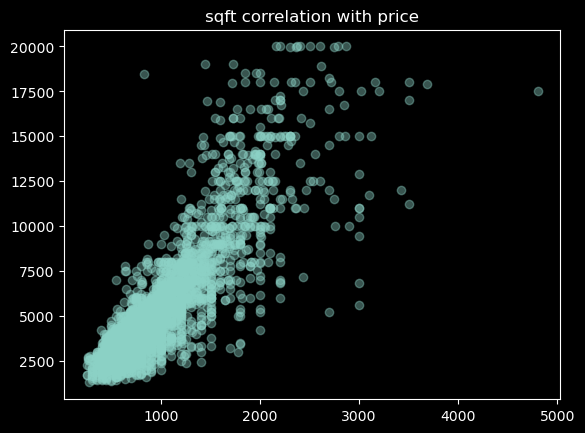

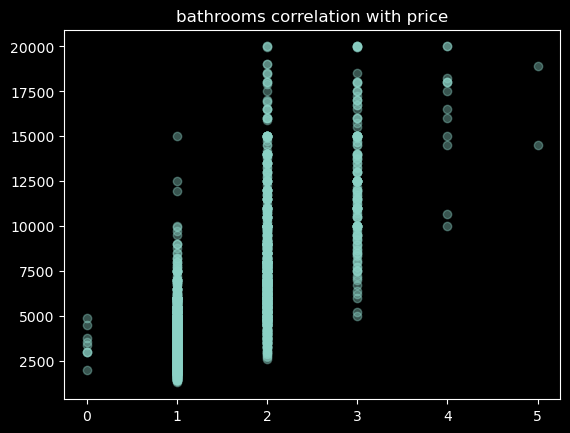

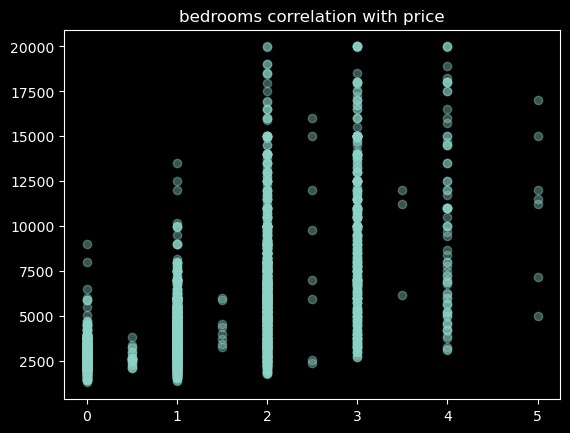

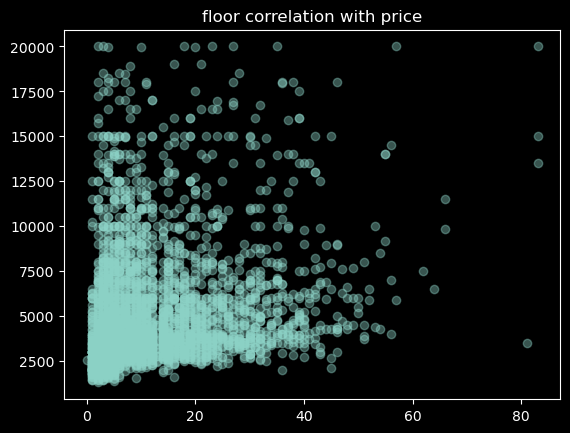

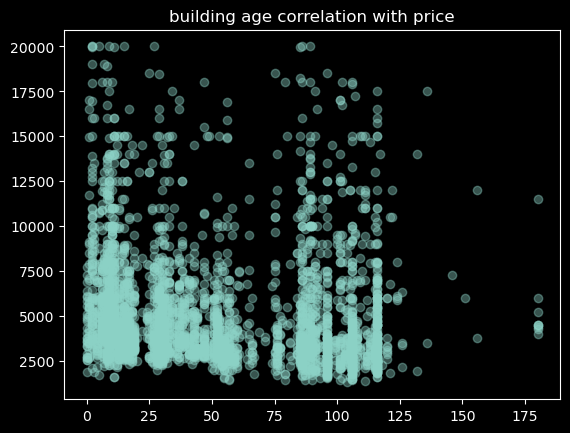

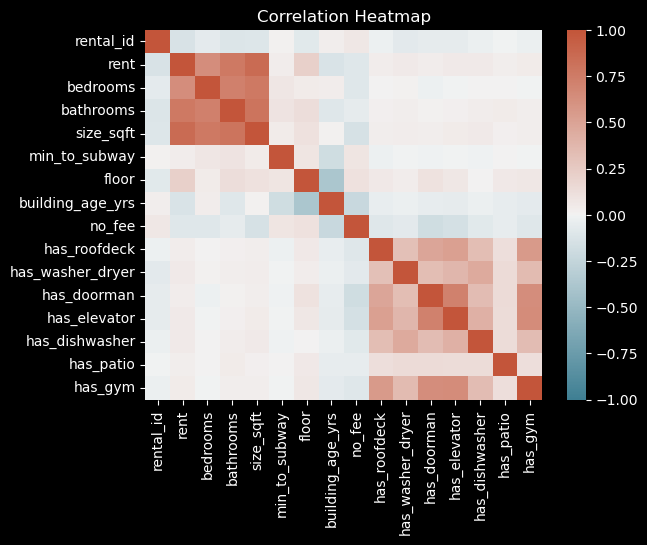

In [5]:
# library for all the visualizations
import matplotlib.pyplot as plt

# plot scatters to show a few attributes and their correlation with price
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)
plt.title("sqft correlation with price")
plt.show()
# seems to be a positive correlation between sqft and price

plt.scatter(df[['bathrooms']], df[['rent']], alpha=0.4)
plt.title("bathrooms correlation with price")
plt.show()
# seems to be a positive correlation between bathrooms and price

plt.scatter(df[['bedrooms']], df[['rent']], alpha=0.4)
plt.title("bedrooms correlation with price")
plt.show()
# seems to be a positive correlation between bedrooms and price

plt.scatter(df[['floor']], df[['rent']], alpha=0.4)
plt.title("floor correlation with price")
plt.show()
# seems to be a slightly positive correlation between floor height and price

plt.scatter(df[['building_age_yrs']], df[['rent']], alpha=0.4)
plt.title("building age correlation with price")
plt.show()
# seems to be no correlation between building age and price

# library create a heatmap to show correlations between all attributes 
import seaborn as sns

#Use the `.corr()` method on `df` to get the correlation matrix 
correlation_matrix = df.corr()

# create heatmap, set hues for negative, positive areas of map and saturation amount.
# create heatmap given: dataset, value range to anchor map with (-1 and 1), colarmap name set above, set title
red_blue = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(correlation_matrix, vmin = -1, vmax = 1, cmap=red_blue).set(title="Correlation Heatmap")
plt.show()


### Accuracy Analysis
Now let's compare our predicted values against our 20% test values we pulled out earlier, this will tells us hows close our rent prediction is to actual's. We'll do this using R² as our loss function. 

R² is a metric that helps us evaluate the accuracy of our regression model, it is the percentage variation in y explained by all the x variables together. For example, say we are trying to predict rent based on the size_sqft and the bedrooms in the apartment and the R² for our model is 0.72 — that means that all the x variables (square feet and number of bedrooms) together explain 72% variation in y (rent). The best possible R² is 1.00 (and it can be negative because the model can be arbitrarily worse). Usually, a R² of 0.70 is considered good.

y predict is 
             0
0  3206.742117
1  3847.148179
2  4425.783773
3  2825.530095
4  5841.308007
y actuals are 
      rent
631   2879
2270  2700
2448  5900
2021  2400
669   5555


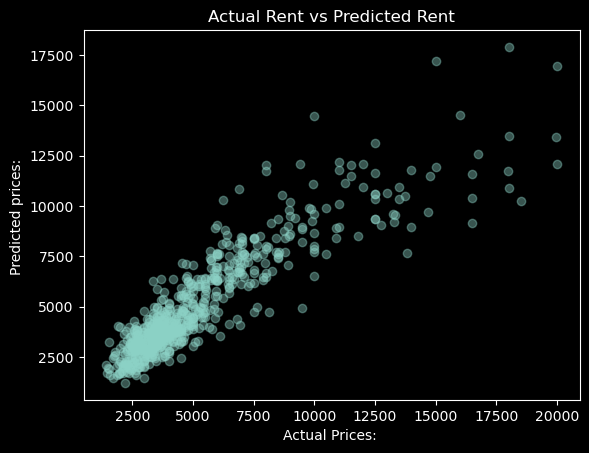

Test score:
0.8050371975357653
residuals is 
             rent
631    327.742117
2270  1147.148179
2448 -1474.216227
2021   425.530095
669    286.308007


c:\Users\qiuy\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


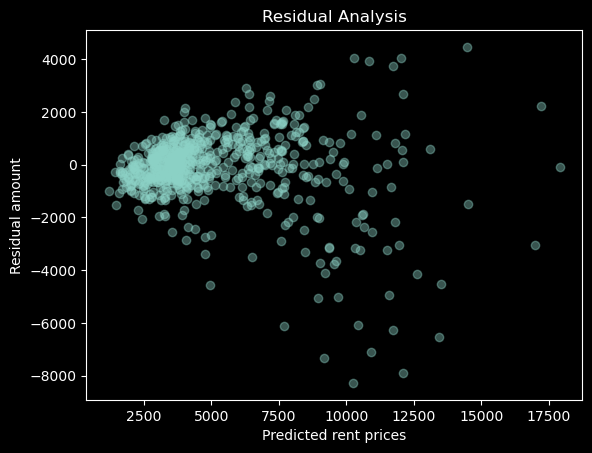

In [8]:
# predict rent given test features this time, instead of training features
y_predict = mlr.predict(x_test.values)

# view the table
view_y_predict = pd.DataFrame(y_predict)
print("y predict is ")
print(view_y_predict.head())

view_y_test = pd.DataFrame(y_test)
print("y actuals are ")
print(view_y_test.head())

# now we have our predicted prices based on MLR and our actual prices from the test set

# plot actual vs predicted rent prices:
# x-axis is actual, y-axis is predicted
# plot y_tests vs y_predicts , 0.4 transparency level
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Prices: ")
plt.ylabel("Predicted prices: ")
plt.title("Actual Rent vs Predicted Rent")
plt.show()
# seems to be an accurate prediction, but how close exactly?

# use the mlr.score function to find our r-squared of our training data below
print("Test score:")
print(mlr.score(x_test, y_test))
# our R^2 for test set is .80, so 80% of the variation in rent can be explained by our x variables.

# residuals = predicted rent prices - actual rent prices
residuals = y_predict - y_test
# view residuals
view_residuals = pd.DataFrame(residuals)
print("residuals is ")
print(view_residuals.head())

plt.scatter(y_predict, residuals, alpha=0.4)
plt.xlabel("Predicted rent prices")
plt.ylabel("Residual amount")
plt.title('Residual Analysis')
 
plt.show()
# we can see the variation among predicted and actual prices as rent goes higher, it becomes harder to predict

### Conclusion
We were able to use the Multiple Linear Regression supervised machine learning method, which uses two or more independent variables to predict the values of the dependent variable, to predict rent of an apartment given attributes. We were able to visualize different areas of correlation as well as quantify and understand the accuracy of or model. With our test set having a 0.8 r-squared, we can see that 80% of the variation in rent can be explained by our x variables which is a reliable amount. From our Residual analysis, we can see that the higher the rent prices, the larger the variation from our predictions and actuals.